In [13]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

In [ ]:
## estimator, model, 알고리즘, classifier

In [2]:
mnist = datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
features, labels = mnist.data, mnist.target

In [6]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [11]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [12]:
X_test.shape, y_test.shape

((360, 64), (360,))

In [31]:
#### single model ####

In [38]:
dtree = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=25,
    random_state=35
)

In [42]:
knn = KNeighborsClassifier(
    n_neighbors=100,
    n_jobs=None
)

In [53]:
svm = SVC(
    C=0.1, 
    gamma=0.003,
    kernel='rbf',
    probability=True ##각 라벨링값으로 될 가능성 구해주세요.!
)

In [40]:
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

In [43]:
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

In [54]:
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [55]:
print('accuracy========================')
print('dtree >> ', accuracy_score(y_test, dtree_predicted))
print('knn >> ', accuracy_score(y_test, knn_predicted))
print('svm >> ', accuracy_score(y_test, svm_predicted))

accuracy========================
dtree >>  0.8888888888888888
knn >>  0.9388888888888889
svm >>  0.8916666666666667


In [76]:
dtree_proba = dtree.predict_proba(X_test)
dtree_proba[[1, 50]]  #5일 확률이 제일 높음.

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [65]:
np.argmax(dtree_proba[:1]), np.argmin(dtree_proba[:1])

(5, 0)

In [77]:
np.argmax(dtree_proba[50]), np.argmin(dtree_proba[50])

(3, 0)

In [73]:
knn_proba = knn.predict_proba(X_test)
knn_proba[[1, 50]] #5일 확률이 제일 높음.

array([[0.  , 0.  , 0.88, 0.08, 0.  , 0.  , 0.  , 0.  , 0.03, 0.01],
       [0.  , 0.01, 0.14, 0.74, 0.  , 0.  , 0.  , 0.03, 0.01, 0.07]])

In [64]:
np.argmax(knn_proba[:1]), np.argmin(knn_proba[:1])

(5, 0)

In [74]:
np.argmax(knn_proba[50]), np.argmin(knn_proba[50])

(3, 0)

In [75]:
svm_proba = svm.predict_proba(X_test)
svm_proba[[1, 50]]  #5일 확률이 제일 높음.

array([[0.00181807, 0.00234139, 0.93321693, 0.00230159, 0.00209669,
        0.00780094, 0.00172921, 0.00387275, 0.04160402, 0.00321841],
       [0.00272881, 0.00398771, 0.01073558, 0.95260563, 0.00309729,
        0.00650571, 0.00212815, 0.00543154, 0.00853704, 0.00424253]])

In [66]:
np.argmax(svm_proba[:1]), np.argmin(svm_proba[:1])

(5, 0)

In [78]:
np.argmax(svm_proba[50]), np.argmin(svm_proba[50])

(3, 6)

In [32]:
##### 앙상블 모델 ##### 

In [79]:
## 하드 보팅
voting_clf1 = VotingClassifier(
    estimators= [
        ('decision tree', dtree), 
        ('knn', knn), 
        ('svm', svm)
    ],
    weights=[1, 1, 1],
    voting='hard'
)

In [81]:
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9527777777777777

In [ ]:
## dtree : 2, knn : 2, svm : 1==> 2(2): 1(1) ==> 다수결의 원칙에 따라 2로 판단!

In [82]:
hard_voting_predicted[[1, 50]]

array([2, 3])

In [83]:
## 소프트 보팅
voting_clf2 = VotingClassifier(
    estimators= [
        ('decision tree', dtree), 
        ('knn', knn), 
        ('svm', svm)
    ],
    weights=[1, 1, 1],
    voting='soft'
)

In [89]:
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9333333333333333

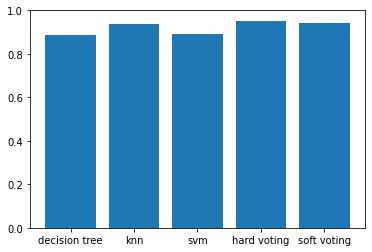

In [87]:
### 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);